In [86]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

In [4]:
from astropy.io import fits

In [5]:
hdu_list = fits.open("Observation_2018-02-07T1847_raw.fits")

In [6]:
hdu_list.info()

Filename: Observation_2018-02-07T1847_raw.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       7   (256, 8192, 1)   float64   


In [7]:
image_data = hdu_list[0].data

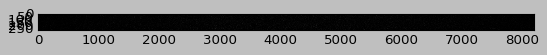

In [12]:
plt.imshow(image_data[0].T, cmap='gray')

In [26]:
image_data[0].shape
np.sqrt(np.mean(image_data**2))
np.std(image_data)*2.0 + np.sqrt(np.mean(image_data**2))

36.637969850465232

Noise estimate: 14.88
Threshold: 53.72
Elements below threshold: 99.25%


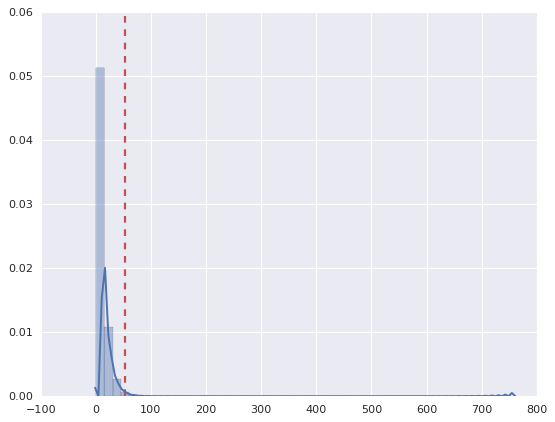

In [108]:
NBINS = 100
hdu_list = fits.open("Observation_2018-02-07T1847_raw.fits")
image_data = hdu_list[0].data[0, :, 0:256]
image_data = image_data[image_data > 0.]
NOISE = np.sqrt(np.mean(image_data**2))
THRES = 4.*np.std(image_data) + np.mean(image_data)

print('Noise estimate: {:0.2f}'.format(NOISE))
print('Threshold: {:0.2f}'.format(THRES))
print('Elements below threshold: {:0.2f}%'.format(image_data[image_data < THRES].shape[0] *100. / image_data.size))

# plt.axvline(NOISE, color='b', linestyle='dashed', linewidth=2)
plt.axvline(THRES, color='r', linestyle='dashed', linewidth=2)
# histogram = plt.hist(image_data.flatten(), NBINS, normed=True)

sns.distplot(image_data.flatten());

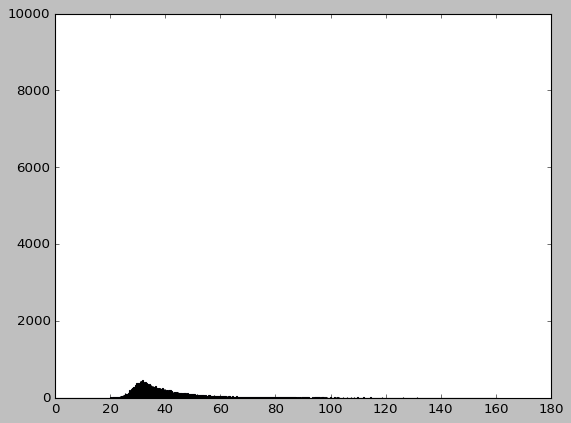

In [21]:
filtered_image_data = fits.getdata("Observation_2018-02-07T1847_filtered.fits")
NBINS = 1000
plt.ylim(0, 10000)
filtered_hist = plt.hist(filtered_image_data[0].flatten(), NBINS)